# BIG MART SALES PREDICTION

In [1]:
# Bigmart is a big supermarket chain, with stores all around the country and 
# its current board set out a challenge to all Data Scientist out there to help them create a
# model that can predict the sales, per product, for each store. BigMart has collected sales data from the year
# 2013, for 1559 products across 10 stores in different cities. With this information the corporation hopes we can
# identify the products and stores which play a key role in their sales and use that information to take the correct
# measures to ensure success of their business.

In [2]:
# PROBLEM ?

    #The aim is to build a predictive model and find out the sales of each product at a particular store.
    #With the outcome as the predicted sales, the BIG MART will try and understand the features of the product and stores       #that are playing a key role in the increase/decrease in the sales. 

# BREAKING THE PROBLEM INTO PARTS

 # 1) HYPOTHESIS GENERATION
 # 2)DATA EXPLORATION
 # 3) PRE-PROCESSING THE DATA
 # 4)BUILDING DIFFERENT REGRESSION MODELS TO PREDICT THE SALES

# 1. Hypothesis Generation:
    # In real world scenarios, hypothesis generation should be done in collaboration with the respective stakeholders.
    # Understand the problem at hand.
    # Before even getting our hands dirty with data, we create a list of features or factors that can possibly affect the         outcome(response/target variable- Sales of a Mart)
    # NOTE : *THIS BUSINESS IS AN OFFLINE MODEL 
    
    # LIST OF FACTORS:
    # PRODUCT LEVEL HYPOTHESIS:
        # INCREASE/DECREASE OF SALES :--> 1)BRAND SELLS
                                          2)GREAT PACKAGING
                                          3)DISCOUNT OFFERS
                                          4)MARKETING 
                                          5)CATEGORY OF THE PRODUCT( DAILY NEEDS, BOUGHT ONCE IN A MONTH etc)
                                          6)EASY OF ACCESSIBILITY IN THE STORE
    # STORE LEVEL HYPOTHESIS:
        # INCREASE/DECREASE OF SALES :--> 1)POPULATION IN THE AREA
                                          2)COMPETETION
                                          3)TIER CLASSIFICATION
                                          4)MARKETING 
                                          5)STORAGE CAPACITY
                                          6)CUSTOMER FRIENDLINESS 
                                          7)IMPORT COST
                                          8)STAFF SALARIES
                                          9)AGE OF THE STORE
    #NOT ALL THE FEATURES WILL BE AVALAIBLE IN THE DATASET THAT WE ARE GOING TO EXPLORE IN THE FURTHER STEPS
    # WE CAN TRY TO FEATURE ENGINEER THE POSSIBLE NEW VARIABLES OR COLLECT THEM FROM EXTERNAL SOURCES(which will highly           depend on invidual problem basis )


# WE WILL IMPORT THE REQUIRED LIBRARIES AS AND WHEN REQUIRED

# 2. DATA EXPLORATION
    # Identify what you have in the data with respect to the list in the hypothesis
    # draw inferences from the data such as number of usable features, categorical/numerical data-type,Missing                   values,correlation , univariate, bivariate,Outlier identification

In [3]:
# READ THE DATA FROM THE SOURCE FILE(WE CURRENTLY HAVE IT IN CSV FORMAT)
import pandas as pd
train=pd.read_csv("D:/DATA SCIENCE/LINEAR REGRESSION AND BASIC ANALOGIES/TRAIN.csv")
test=pd.read_csv("D:/DATA SCIENCE/LINEAR REGRESSION AND BASIC ANALOGIES/TEST.csv")

In [4]:
#COMBINING THE DATABASE TO AVOID RUNNING THE SAME STEPS OF PRE-PROCESSING 
# MARK THE TEST AND TRAIN RESPECTIVELY USING A NEW COLUMN
train['BELONGS_TO']='train'
test['BELONGS_TO']='test'

data= pd.concat([train,test],ignore_index=True,sort=False)

In [5]:
# LET's see if it looks fine?

data[0:5] # equivalent to data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,BELONGS_TO
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data[-5:] # equivalent to data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,BELONGS_TO
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [7]:
# LET'S SEE WHAT DATA TYPE EACH VARIABLE BELONGS TO ?
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
BELONGS_TO                    object
dtype: object

In [8]:
# The shape of the data
data.shape

(14204, 13)

In [9]:
# Now we see some statistical properties related to the available numerical features in the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# # BASIC INFERENCES AROUND THE SUMMARY ABOVE:
    # 1)Outlets(stores) were established from 1985 to 2009
    # 2)Visibility has a minimum of "zero" which cannot be possible.(A)
    # 3)weight and outlet sales have lesser count as compared to the shape of the dataset( we will explore the exploaration in the missing count)


## CHECKING THE FILL RATE

In [11]:

# MISSING VALUES - one of the challenge that we need to tackle in the pre processing step
# data.isnull().sum()

x=(data.isnull().sum() * 100 / len(data)).round(2).sort_values(ascending=False)
y=data.isnull().sum().sort_values(ascending=False)
pd.concat([x,y],axis=1,keys=['PRECENT','COUNT'])

,PRECENT,COUNT
Item_Outlet_Sales,40.00,5681
Outlet_Size,28.27,4016
Item_Weight,17.17,2439
BELONGS_TO,0.00,0
Outlet_Type,0.00,0
Outlet_Location_Type,0.00,0
Outlet_Establishment_Year,0.00,0
Outlet_Identifier,0.00,0
Item_MRP,0.00,0
Item_Type,0.00,0


In [12]:
# # BASIC INFERENCES AROUND THE SUMMARY ABOVE:
    # 1) Item weight and Outlet size are genuinely have missing values
    # 2) The target variable(Item_Outlet_Sales) has missing for the unlabelled source- test data set

## DATA EXPLORATION FOR POSSIBLE AND IMMEDIATE FEATURE ENGINEERING

In [13]:
# we will check the unique count that every  variable holds 
data.apply(lambda u: len(u.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
BELONGS_TO                       2
dtype: int64

In [14]:
# # BASIC INFERENCES AROUND THE SUMMARY ABOVE:
    # 1) we have 1559 items that are being sold
    # 2) we have 10 stores currently
    # 3) 4 different types of categories of stores
    # 4) available in three different type of locations
    # 5) we have 16 different category of items

# UNIVARIATE ANALYSIS OF THE CATEGORICAL VARIABLES-- USING THE TRAIN SET 

# EXPLORING THE CATEGORICAL VARIABLES FIRST

## LET'S EXPLORE THE FREQUENCY WITHIN EACH CATEGORICAL FEATURE 

In [15]:
#Filter categorical variables
cat_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID columns and BELONGS_TO:
cat_columns = [x for x in cat_columns if x not in ['Item_Identifier','Outlet_Identifier','BELONGS_TO']]
#Print frequency of categories
for col in cat_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [16]:
# # TAKING INTO CONSIDERATION EACH FEATURE ABOVE ONE AT A TIME:
#     1) ITEM_FAT_CONTENT: from the summary above we majorly have two categories which are misspelled,
#         post correcting them we should have two categories of the feature(B)
#     2) ITEM_TYPE : we should probably combine some of these as all of them do not have a subtantial weight in the distribution
#     3) Outlet size : looks just fine to me
#     4) OUtlet Location type : looks fine
#     5) Outlet type : Super market 2,3 and grocery store can be combined

# PLOTTING CHARTS FOR A BETTER VISUAL UNDERSTANDING OF THE FEATURES 

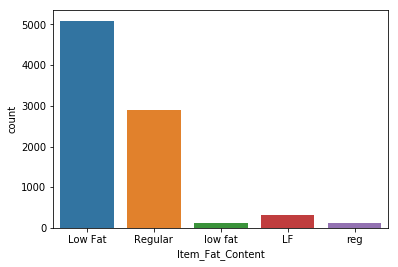

In [17]:
# ITEM FAT CONTENT
%matplotlib inline
import seaborn as sns
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

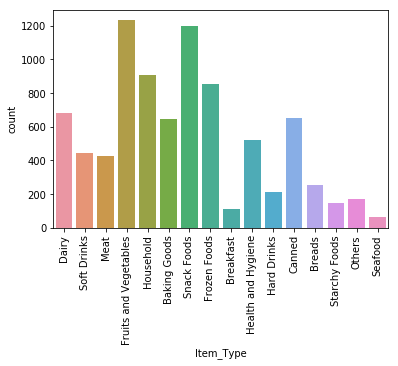

In [18]:
# ITEM TYPE
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

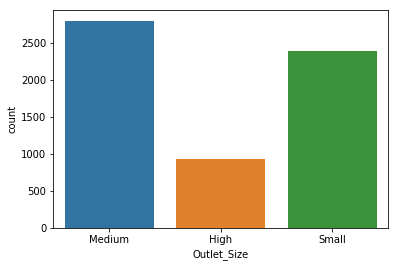

In [19]:
# OUTLET SIZE
sns.countplot(train.Outlet_Size)
# we have few outlets with huge size

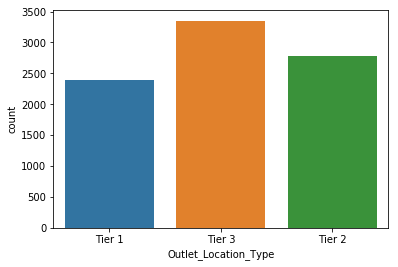

In [20]:
# TIER/ LOCATION TYPE
sns.countplot(train.Outlet_Location_Type)
# other than the usual assumption that will be : more supermarts will be in the tier 1(densily populated area) is not that 
# evident from the graph below, the small to medium cities have more presence of the brands

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

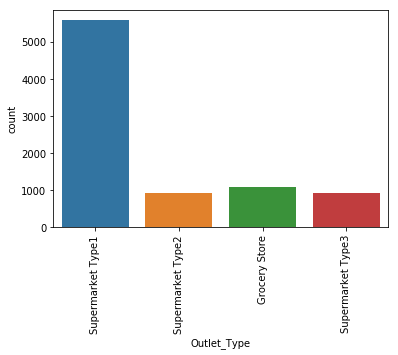

In [21]:
# THE TYPE OF THE OUTLET --- Supermarts and Groceries
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

# Can 2,3 and groceries be still combined??? we should go ahead and do a bivariate analysis and see if that could give us some additional
#details?

# BIVARIATE FOR THE CATEGORICAL VARIABLES-- USING THE TRAIN SET

In [22]:
# WHAT IMPACT CAN DIFFERENT CATEGORICAL VARIABLES CAN HAVE ON THE RESPONSE VARIABLE????

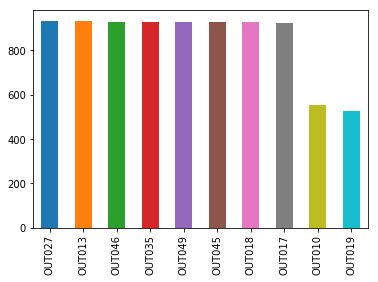

In [23]:
# OUTLET IDENTIFIER AND THE OUTLET SALES( we are taking the count of sales in the plot)
train.Outlet_Identifier.value_counts().plot(kind='bar')

In [24]:
# FROM ABOVE IT IS PRETTY EVIDENT THAT THE OUTLET 019 and 010 have the lowest number of sales

# LET's SEE HOW THE OUTLET TYPE PLAYS A ROLE HERE??? OR NOT ?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


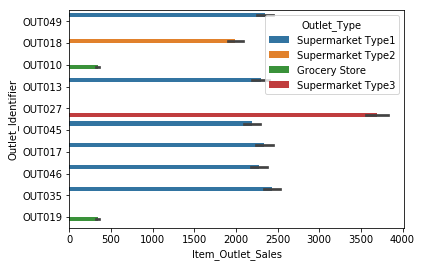

In [25]:
sns.barplot(train['Item_Outlet_Sales'],train['Outlet_Identifier'],hue=train['Outlet_Type'])

In [26]:
# THUS THE OUTLET 019 and 010 are from the category "grocery", we are assuming them to be small compared to others

In [27]:
# NOW WHAT KIND OF STORE SIZE DO THE CUSTOMERS PREFER USUALLY??
# WE WILL LOOK AT THE OUTLET SIZE WITH RESPECT TO THE OUTLET SALES

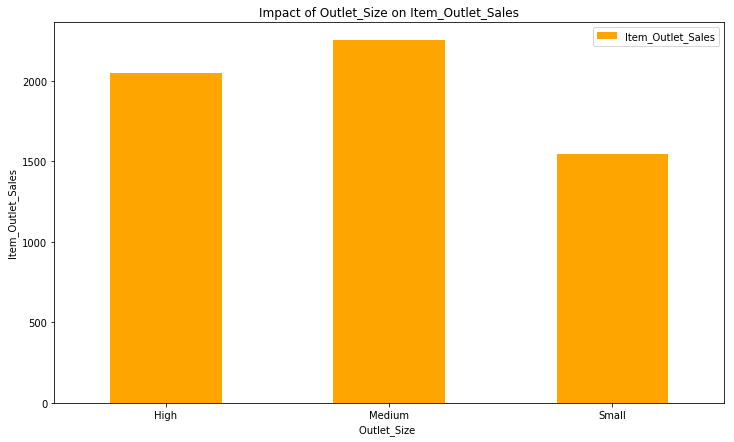

In [28]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='orange',figsize=(12,7))
plt.xlabel('Outlet_Size ')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [29]:
# THE GRAPH ABOVE SHOW THAT THE CUSTOMER ARE MORE INCLINED TOWARDS BUYING AN ITEM FROM THE MEDIUM SIZE STORES? 
# Isn't that interesting ?
# won't the tier1(highpopulation density) have all of the stores with high in size??
# Let's look at what type of stores are available in the different tiers?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


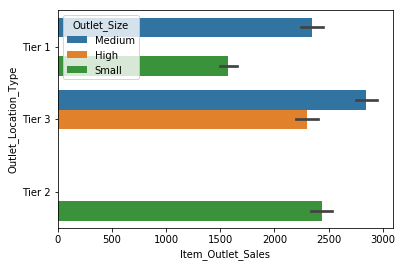

In [30]:
sns.barplot(train['Item_Outlet_Sales'],train['Outlet_Location_Type'],hue=train['Outlet_Size'])

In [31]:
# FROM THE GRAPH ABOVE WE CAN SEE THAT : The medium size are giving us highest sales are indeed present in Tier 1 and Tier3 both
# Hence our assumption of population density supporting the Outlet sales is being dependent on the type of store which is presen that city 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


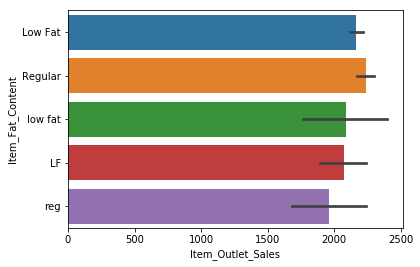

In [32]:
# EXPLORING FAT CONTENT
sns.barplot(train['Item_Outlet_Sales'],train['Item_Fat_Content'])


In [33]:
# Daily use products should have a higher tendency to sell as compared to the specific use products.
# “Low Fat” products seem to have higher sales values than “Regular” products.
# we need to combine the sub categories at broader level in the pre processing steps

# UNIVARIATE / CORRELATION ANALYSIS OF THE NUMERICAL/CONTINIOUS VARIABLES

In [34]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


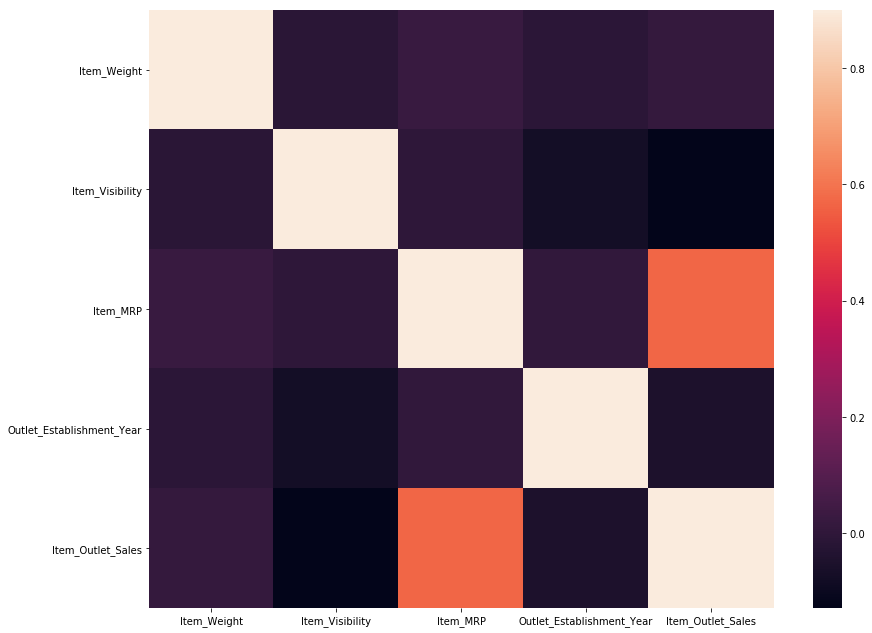

In [35]:
#correlation matrix
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corr, vmax=.9);

In [36]:
# LET"S SORT THIS WITH RESPECT TO OUR RESPONSE
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


In [37]:
# MRP has the highest correlation with the response, followed by Weight , Establishment Year and

#lowest of all is Item Visibility-- we need to confirm this, as more visible once should be sold at a higher rate than others
# from a store

# LET's do a Kutosis for our response variable?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Item_Outlet_Sales Distribution')

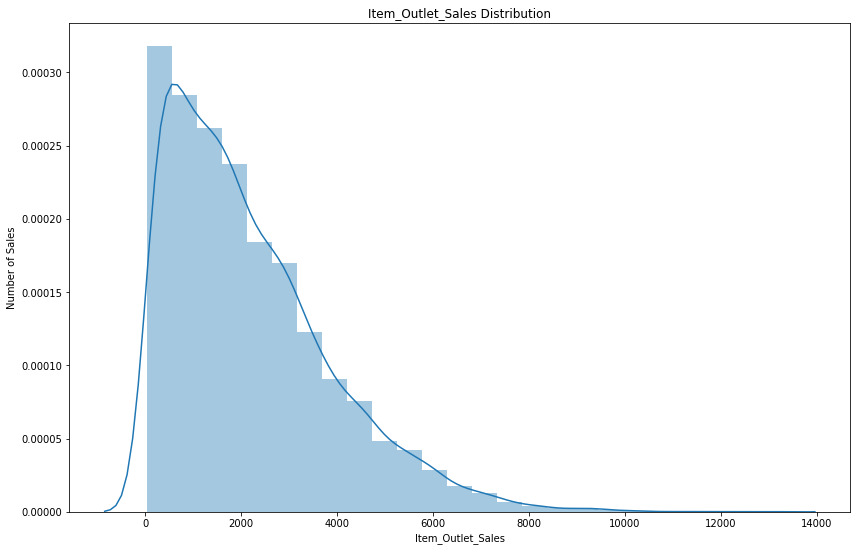

In [38]:
# plt.style.use(['dark_background', 'presentation'])

plt.figure(figsize=(14,9))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [39]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution

In [40]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


# BIVARIATE ANALYSIS FOR THE CONTINUOUS VARIABLE

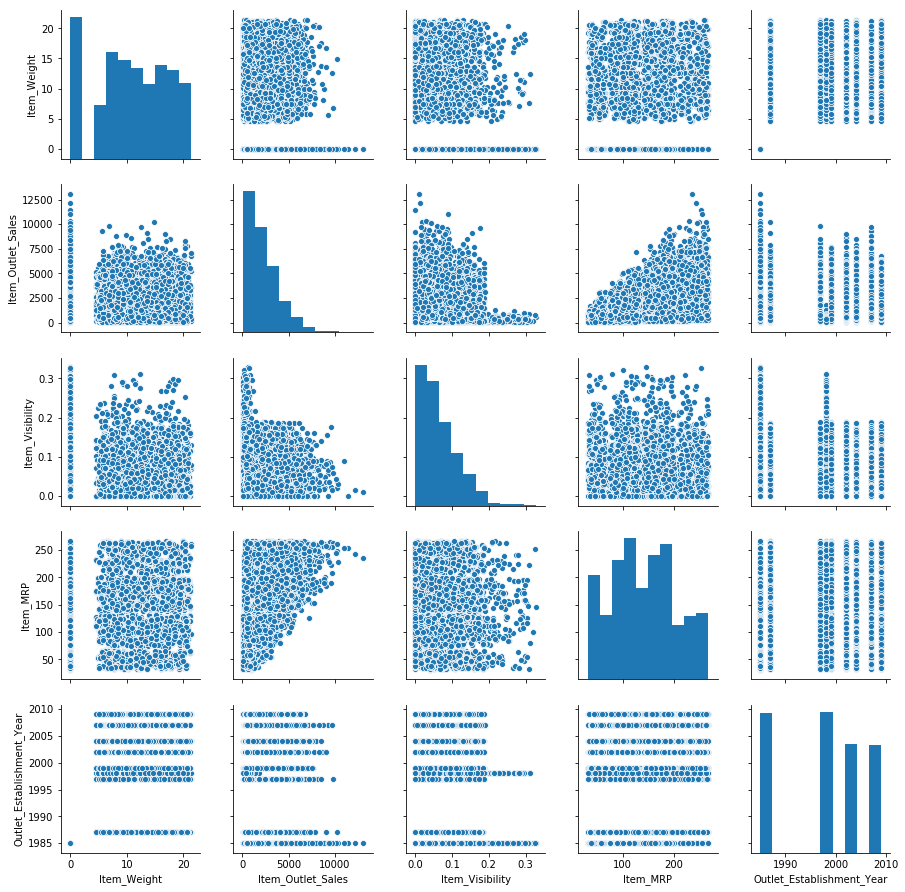

In [41]:
train_data = train.fillna(0)
sns.pairplot(train_data[['Item_Weight','Item_Outlet_Sales','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [42]:
#WEIGHT
# THE CORRELATION SUMMARY AND THE ABOVE GRAPH HELPS US TO CONCLUDE THAT:
#The item weight has a low correlation with the target variable


#VISIBILITY
# CONCLUSION: the item visibility is negatively correlated with the target variable , thus the more visible products are sold 
#less according to our dataset 
#Furthermore, there is a concerning number of products with visibility zero as discussed earlier which need to be handled in 
# preprocessing steps


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


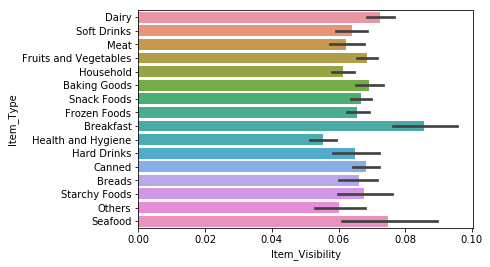

In [43]:
# # We can further enquire the above assumption on the basis of how the products are sold in the outlets and
# # with their visibility in the same
# # plt.style.use('classic')
sns.barplot(train['Item_Visibility'],train['Item_Type'])
# # plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


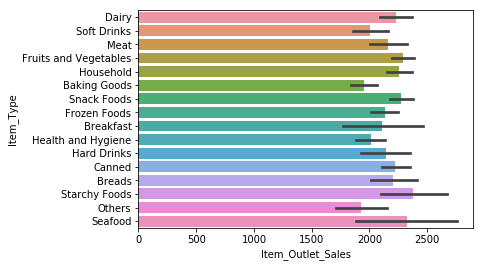

In [44]:
sns.barplot(train['Item_Outlet_Sales'],train['Item_Type'])

In [45]:
# It is evident that the type of items which are being sold more have lower visibility in 

# 3. PRE-PROCESSING- 
## WE WILL CONSIDER THE WHOLE COMBINED BASE AS MENTIONED EARLIER TO AVOID RE RUNNING THE NECESSARY STEPS OF PRE-PROCESSING

## IMPUTING MISSING VALUES

In [46]:
# we will start with imputing the missing values wherever necessary
# as identified earlier weight of the item and size of the outlet(store)

#WEIGHT 
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

# #Impute data

data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])





In [47]:
#OUTLET SIZE
# as it have three categories namely : 1) Small 2) Medium 3)High
# we should impute this on the basis of mode of the OUTLET SIZE FOR A OUTLET TYPE

from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]) )


#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


# CHECK THE FILL RATE AGAIN

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

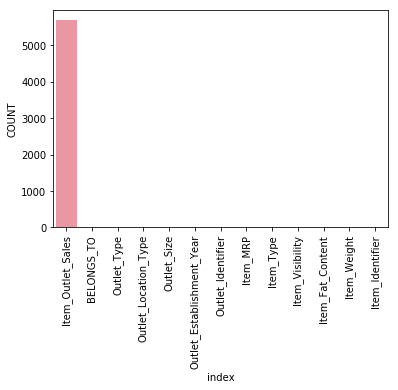

In [48]:
x=(data.isnull().sum() * 100 / len(data)).round(2).sort_values(ascending=False)
y=data.isnull().sum().sort_values(ascending=False)
FR=pd.concat([x,y],axis=1,keys=['PRECENT','COUNT']).reset_index()
sns.barplot(FR['index'],FR['COUNT'])
plt.xticks(rotation=90)

In [49]:
# Okay, so we do not have any missing values to impute now.
#Let's get further with this

# FEATURE ENGINEERING

In [50]:
# we will Tackle "A" as mentioned above that visibility cannot be Zero.
# let's impute it with an average value as per the Item Identifier
#WEIGHT 
#Determine the average weight per item:
item_avg_visibility = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

# #Get a boolean variable specifying missing Item_Weight values
zero_visibility = data['Item_Visibility']==0


# # #Impute data

data.loc[zero_visibility,'Item_Visibility'] = data.loc[zero_visibility,'Item_Identifier'].apply(lambda x: item_avg_visibility.loc[x])
# train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [51]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.069710,141.004977,1997.830681,2181.288914
std,4.651716,0.049728,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.031145,94.012000,1987.000000,834.247400
50%,12.600000,0.057194,142.247000,1999.000000,1794.331000
75%,16.750000,0.096930,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [52]:
# we will tackle the Fat Content Variable
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})


In [53]:
# Taking care of the multiple item type, we will create a broader level of category for them.
# If you look closely at the item identifier's first two characters , which are repetetive and common in multiple case
# we will map them as following:
# 1)FD- Food
# 2)NC- Non-Consumable
# 3)DR- Drinks
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})


BUT WAIT , DO WE HAVE SOME CATEGORY OF FAT CONTENT FOR THE NON CONSUMABLES??

In [54]:
pd.crosstab(data['Item_Type_Combined'],data['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Item_Type_Combined,,
Drinks,1208,109
Food,5291,4910
Non-Consumable,2686,0


In [55]:
# We need to give this a category 
data['Item_Fat_Content']=np.where(data['Item_Type_Combined']=='Non-Consumable',data['Item_Fat_Content'].replace({'Low Fat':'NON-EDIBLE'}),data['Item_Fat_Content'])

In [56]:
pd.crosstab(data['Item_Type_Combined'],data['Item_Fat_Content'])

Item_Fat_Content,Low Fat,NON-EDIBLE,Regular
Item_Type_Combined,,,
Drinks,1208,0,109
Food,5291,0,4910
Non-Consumable,0,2686,0


In [57]:
# STORE AGE
#NOw let's create a variable using the Item_Establishment_year as the age of the outlet will have more context in the current problem statement
#Remember the data is as of  2013 as stated in the problem statement in the beginning
data['Store_Age_Years'] = 2013 - data['Outlet_Establishment_Year']

In [58]:
# Do we really have to combine the Outlet_Type?
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [59]:
#As observed by the results above, the average product sales are significantly different so we do not necessarily have to combined 
#them to get some significance out of it

# BASE LINE MODEL USING MEAN OF THE OUTLET SALES

In [60]:
# Determine mean of the output column:
mean_sales = train['Item_Outlet_Sales'].mean()
#Initialize submission dataframe with ID varaibles
base1 = test[['Item_Identifier','Outlet_Identifier']]
#Assign outcome variable to mean value:
base1['Item_Outlet_Sales'] = mean_sales
#Export submission:
base1.to_csv("submission_baseline1.csv",index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
# Let us look at the dataset again before splitting it into train, test and Validation

In [62]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,BELONGS_TO,Item_Type_Combined,Store_Age_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,NON-EDIBLE,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


In [63]:
# we can clearly drop 
# 1)Outlet_Establishment_Year(as we have engineered it already into Store_Age_Years)

data.drop(['Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)




In [64]:
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
BELONGS_TO               object
Item_Type_Combined       object
Store_Age_Years           int64
dtype: object

In [65]:
# Secondly we can keep the Outlet Identifier while training the model, but of course in a numeric form as scikit-learn accepts numeric
# therefore we will keep a copy of Outlet_Identifier into Store_ID
data['Store_ID']=data['Outlet_Identifier']

In [66]:
# BEFORE SPLITTING THE DATASET BACK INTO TRAIN AND TEST, WE NEED TO USE ONE HOT ENCODING SO THAT EVEN THE CATEGORICAL FEATURES CAN
# BE USED TO TRAIN 

# creating dummy variables to convert categorical into numeric values 
mylist = list(data.select_dtypes(include=['object']).columns) 
mylist = [x for x in mylist if x not in ['Item_Identifier','Outlet_Identifier','BELONGS_TO']]


def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode],drop_first=True)
#     For example, the Item_Fat_Content has 3 categories — LowFat,Regular,Non-Edible. One hot coding will remove 
#     this variable and generate 3 new variables.
#     Each will have binary numbers — 0 (if the category is not present) and 1(if category is present).
 # we are dropping the the first category to reduce the covariance among the features, as the the same information is provided
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(feature_to_encode, axis=1)
    return(res)
COMBINED=encode_and_bind(data,mylist)

In [67]:
COMBINED.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,BELONGS_TO,Store_Age_Years,Item_Fat_Content_NON-EDIBLE,Item_Fat_Content_Regular,...,Item_Type_Combined_Non-Consumable,Store_ID_OUT013,Store_ID_OUT017,Store_ID_OUT018,Store_ID_OUT019,Store_ID_OUT027,Store_ID_OUT035,Store_ID_OUT045,Store_ID_OUT046,Store_ID_OUT049
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,14,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,4,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,14,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,train,15,0,1,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,train,26,1,0,...,1,1,0,0,0,0,0,0,0,0


In [68]:
# Next we need to break the dataset back into train and test and dropping unnecessarry columns from the respective base

train=COMBINED[COMBINED['BELONGS_TO']=='train']
train.drop('BELONGS_TO',axis=1,inplace=True)
test=COMBINED[COMBINED['BELONGS_TO']=='test']
test.drop(['BELONGS_TO','Item_Outlet_Sales'],axis=1,inplace=True)
train.shape,test.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


((8523, 28), (5681, 27))

In [69]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Store_Age_Years',
       'Item_Fat_Content_NON-EDIBLE', 'Item_Fat_Content_Regular',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_nan',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Store_ID_OUT013',
       'Store_ID_OUT017', 'Store_ID_OUT018', 'Store_ID_OUT019',
       'Store_ID_OUT027', 'Store_ID_OUT035', 'Store_ID_OUT045',
       'Store_ID_OUT046', 'Store_ID_OUT049'],
      dtype='object')

# LET'S ASSIGN WHAT IS OUR TARGET, ID AND PREDICTORS BEFORE FITTING ANY MODEL 

In [70]:
#Define target and ID columns and the initial predictors:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
v=['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Store_Age_Years',
       'Item_Fat_Content_NON-EDIBLE', 'Item_Fat_Content_Regular',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_Combined_Food',
       'Item_Type_Combined_Non-Consumable', 'Store_ID_OUT013',
       'Store_ID_OUT017', 'Store_ID_OUT018', 'Store_ID_OUT019',
       'Store_ID_OUT027', 'Store_ID_OUT035', 'Store_ID_OUT045',
       'Store_ID_OUT046', 'Store_ID_OUT049']

predictors_i = [x for x in v if x not in ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [71]:
# Let's play with predictors and see what is important and what is not????

# WHO WILL DIE FIRST IN THE RACE OF IMPORTANCE.

# We will use one of the wrapper methods
#Recursive feature elimination is based on the idea to repeatedly construct a model
# (for example an SVM or a regression model) and choose either the best or worst performing feature
# (for example based on coefficients), setting the feature aside and then repeating the process with the 
# rest of the features. This process is applied until all features in the dataset are exhausted. Features 
# are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding 
# the best performing subset of features.

# The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration.
# Just as non-regularized regression can be unstable, so can RFE when utilizing it, while using ridge regression 
# can provide more stable results.

# Sklearn provides RFE for recursive feature elimination and RFECV for finding the ranks together with optimal
# number of features via a cross validation loop.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore') 
names=train[predictors_i].columns
#use logistic regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(train[predictors_i],train[target])
 

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [72]:
print ("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:


[(1, 'Outlet_Size_Medium'),
 (2, 'Outlet_Type_Supermarket Type2'),
 (3, 'Store_ID_OUT049'),
 (4, 'Outlet_Type_Supermarket Type3'),
 (5, 'Store_ID_OUT027'),
 (6, 'Store_ID_OUT018'),
 (7, 'Outlet_Type_Supermarket Type1'),
 (8, 'Store_ID_OUT013'),
 (9, 'Store_ID_OUT019'),
 (10, 'Outlet_Size_Small'),
 (11, 'Outlet_Location_Type_Tier 2'),
 (12, 'Store_ID_OUT046'),
 (13, 'Item_Visibility'),
 (14, 'Store_ID_OUT035'),
 (15, 'Store_ID_OUT017'),
 (16, 'Item_Type_Combined_Food'),
 (17, 'Store_Age_Years'),
 (18, 'Item_Fat_Content_Regular'),
 (19, 'Store_ID_OUT045'),
 (20, 'Outlet_Location_Type_Tier 3'),
 (21, 'Item_MRP'),
 (22, 'Item_Type_Combined_Non-Consumable'),
 (23, 'Item_Fat_Content_NON-EDIBLE'),
 (24, 'Item_Weight')]

# SUB SAMPLE TAKEN TILL 1000 rows from train set

In [73]:
# But do we really trust the above ranking as the stability only depends on the model being used.
# What can help there is subsampling the data and running the selection algorithms on the subsets. 
# If the results are consistent across the subsets, it is relatively safe to trust the stability 
# of the method on this particular data and therefor straightforward to interpret the data in terms of the ranking.

# let's take a somple from the train set
train_sample=train[0:1000]
rfe.fit(train_sample[predictors_i],train_sample[target])
print ("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:


[(1, 'Store_ID_OUT027'),
 (2, 'Outlet_Type_Supermarket Type1'),
 (3, 'Outlet_Type_Supermarket Type2'),
 (4, 'Store_ID_OUT013'),
 (5, 'Outlet_Size_Small'),
 (6, 'Store_ID_OUT019'),
 (7, 'Store_ID_OUT046'),
 (8, 'Outlet_Location_Type_Tier 2'),
 (9, 'Outlet_Size_Medium'),
 (10, 'Store_ID_OUT018'),
 (11, 'Outlet_Type_Supermarket Type3'),
 (12, 'Item_Visibility'),
 (13, 'Store_ID_OUT017'),
 (14, 'Store_ID_OUT035'),
 (15, 'Item_Type_Combined_Food'),
 (16, 'Item_Type_Combined_Non-Consumable'),
 (17, 'Store_ID_OUT049'),
 (18, 'Outlet_Location_Type_Tier 3'),
 (19, 'Item_Fat_Content_Regular'),
 (20, 'Item_Fat_Content_NON-EDIBLE'),
 (21, 'Store_ID_OUT045'),
 (22, 'Store_Age_Years'),
 (23, 'Item_MRP'),
 (24, 'Item_Weight')]

# SUB SAMPLE TAKEN TILL 1001-5000 rows from train set

In [74]:
train_sample=train[1001:5000]
rfe.fit(train_sample[predictors_i],train_sample[target])
print ("Features sorted by their rank:")
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:


[(1, 'Store_ID_OUT027'),
 (2, 'Outlet_Type_Supermarket Type1'),
 (3, 'Outlet_Type_Supermarket Type2'),
 (4, 'Store_ID_OUT013'),
 (5, 'Outlet_Size_Small'),
 (6, 'Store_ID_OUT019'),
 (7, 'Outlet_Size_Medium'),
 (8, 'Outlet_Type_Supermarket Type3'),
 (9, 'Item_Visibility'),
 (10, 'Outlet_Location_Type_Tier 2'),
 (11, 'Store_ID_OUT046'),
 (12, 'Store_ID_OUT049'),
 (13, 'Store_ID_OUT018'),
 (14, 'Item_Type_Combined_Food'),
 (15, 'Item_Type_Combined_Non-Consumable'),
 (16, 'Item_Fat_Content_NON-EDIBLE'),
 (17, 'Store_ID_OUT035'),
 (18, 'Store_ID_OUT017'),
 (19, 'Item_Fat_Content_Regular'),
 (20, 'Store_Age_Years'),
 (21, 'Store_ID_OUT045'),
 (22, 'Item_MRP'),
 (23, 'Outlet_Location_Type_Tier 3'),
 (24, 'Item_Weight')]

In [111]:
# CONCLUSION: THE RESULTS ARE more or less consistent with the variables which are eliminated at the end.
#let's pick top 15  from them
predictors=[ 'Outlet_Size_Small',
  'Outlet_Location_Type_Tier 2',
  'Store_ID_OUT046',
  'Item_Visibility',
 'Store_ID_OUT035','Store_ID_OUT017',
 'Item_Type_Combined_Food',
  'Store_Age_Years',
  'Item_Fat_Content_Regular',
  'Store_ID_OUT045',
  'Outlet_Location_Type_Tier 3',
  'Item_MRP',
  'Item_Type_Combined_Non-Consumable',
  'Item_Fat_Content_NON-EDIBLE',
  'Item_Weight']

# Generic function 
##  which takes the algorithm and data as input and makes the model,
## performs cross-validation and 
## generates a submission file

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def fit_model(algo, train,test, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    algo.fit(train[predictors], train[target])
        
#Predict training set:
    train_predictions = algo.predict(train[predictors])
    
#     #Remember the target had been normalized
#     Sq_train = (train[target])**2


#Perform cross-validation:
    cv_score = cross_val_score(algo, train[predictors],train[target] , cv=5, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
#Predict on testing data:
    test[target] = algo.predict(test[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: test[x] for x in IDcol})
    submission.to_csv(filename, index=False)

# WHY ARE WE PERFORMING CROSS_ VALIDATION ???

In [100]:
#To avoid leakage of information from the train to test, we hold out some data from the train set itself for validation and
# then we do the evaluation of how our algorithm performs on the unseen data(test set)

#However, by partitioning the available data into three sets, we drastically reduce the number of
# samples which can be used for learning the model, 
# and the results can depend on a particular random choice for the pair of (train, validation) sets.


# A solution to this problem is a procedure called cross-validation (CV for short). 
# A test set should still be held out for final evaluation, but the validation set is no longer 
# needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets
# (other approaches are described below, but generally follow the same principles). 
# The following procedure is followed for each of the k “folds”:

# A model is trained using  of the folds as training data;

# the resulting model is validated on the remaining part of the data 
# (i.e., it is used as a test set to compute a performance measure such as accuracy).

# The performance measure reported by k-fold cross-validation is then the average of the 
# values computed in the loop. This approach can be computationally expensive, but does not waste
# too much data (as is the case when fixing an arbitrary validation set), which is a major
# advantage in problems such as inverse inference where the number of samples is very small.


![alt text](grid_search_cross_validation.png "THE PROCESS OF CROSS VALIDATION")

# WHY OR HOW SPECIFICALLY DID WE USE THE SCORING METRIC

#let's check what exacly do we have as the options ?
#list(sklearn.metrics.SCORERS.keys())

![alt text](Scoring_metrics.png "Scoring Options")

In [ ]:
# 

# LINEAR REGRESSION

In [112]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

fit_model(LR, train, test, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1262
CV Score : Mean - 1264 | Std - 16.13 | Min - 1236 | Max - 1282


# DECISION TREE

In [113]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=20, min_samples_leaf=100)
fit_model(DT, train, test, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 1302
CV Score : Mean - 1307 | Std - 43.75 | Min - 1257 | Max - 1376


# XG BOOST

In [114]:
from xgboost import XGBRegressor
XGB = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# this can be further tuned using grid search
fit_model(XGB, train, test, predictors, target, IDcol, 'XGB.csv')

[17:01:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:01:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Model Report
RM